<a href="https://colab.research.google.com/github/Rajya-3154/tech-a-intern/blob/main/EDA_Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:



import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fifa-data-for-eda-and-stats:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2409047%2F4070180%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240627%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240627T134036Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4789926dfc238f08722a1918dc01fdc636e18125b4e8104f29e860ffc17959ef1b9a70cf2b33b8b591fa80e26db3553fe7066fcb1c5cf1c607fb488c69413a9aaae9b79cbf591d300a38c3f4507682cba8a6b6789e34554a670784888320d5cde5c2b75f12d16a77804806ea419de7eb947d98a9c99c5fd86c7f09afb6bf746b7fbf1d8a830d54c8e53d62f4467d75d1b45a702a011f912ed667e1145d484a42784d75b6b01292825e64638d1fc10377628a9364094299f914c0fb7874979e243df4541bdd63e42da4562a8da8182f9ac4b1b97187d03a45dfc2b38e642d26b08a2a70c8585e875cd3eeb6a61f35977fdf33ac0fd6f9464cfe31cae6a7557d1c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1523740 bytes downloaded
Downloaded and uncompressed: fifa-data-for-eda-and-stats
Data source import complete.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("/kaggle/input/fifa-data-for-eda-and-stats/fifa_eda_stats.csv")

In [4]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.shape

(18207, 57)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [7]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [10]:
for col in df.columns:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Loaned From                 0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpee

In [12]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

<ipython-input-13-8e86cb481730>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Name",data=df[: 30],palette="Set1")


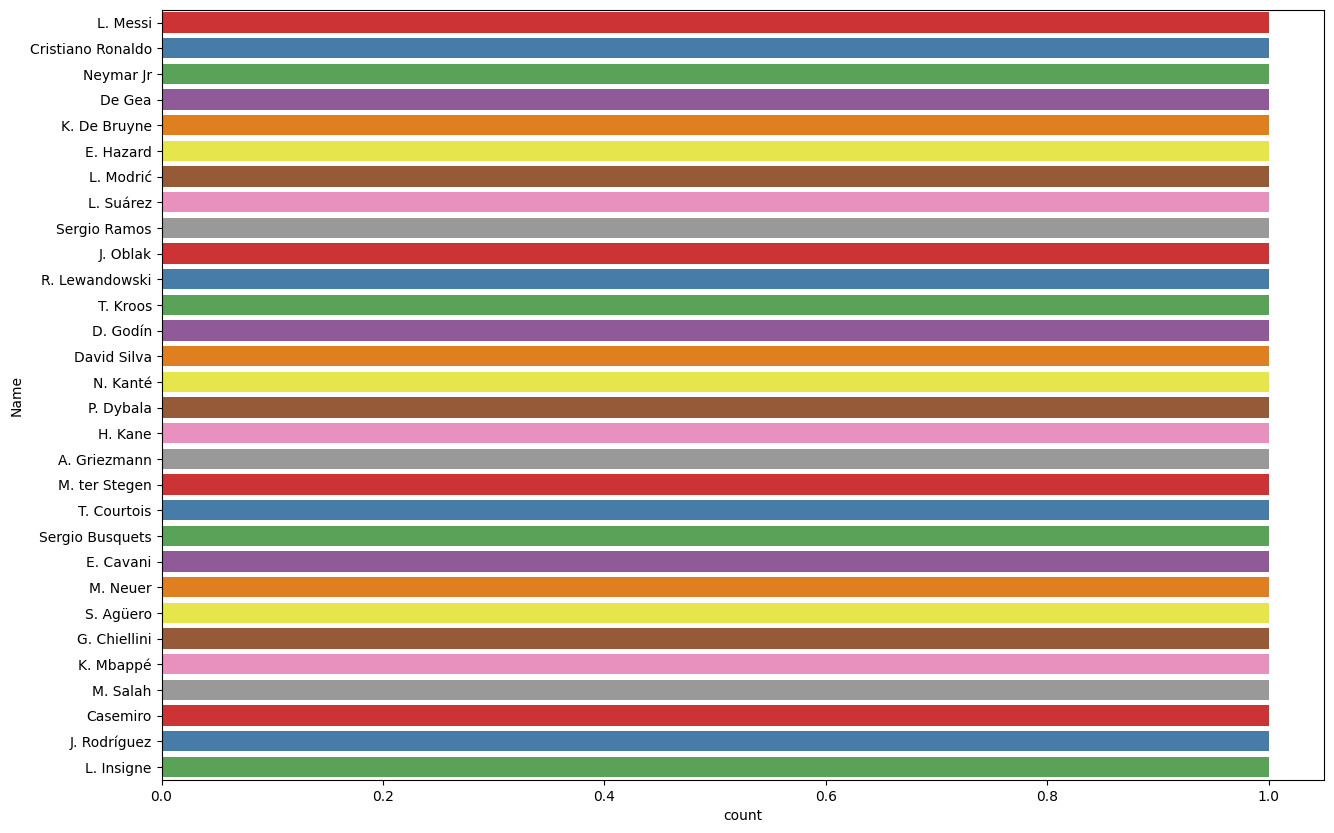

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(y="Name",data=df[: 30],palette="Set1")
plt.show()

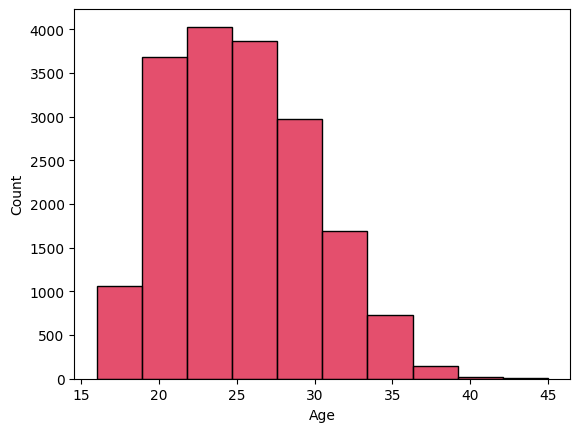

In [14]:
sns.histplot(data=df, x="Age", binwidth=3,color="crimson")
plt.show()

<ipython-input-15-69c818f9fbb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Nationality",data=df[: 50],palette="hsv")


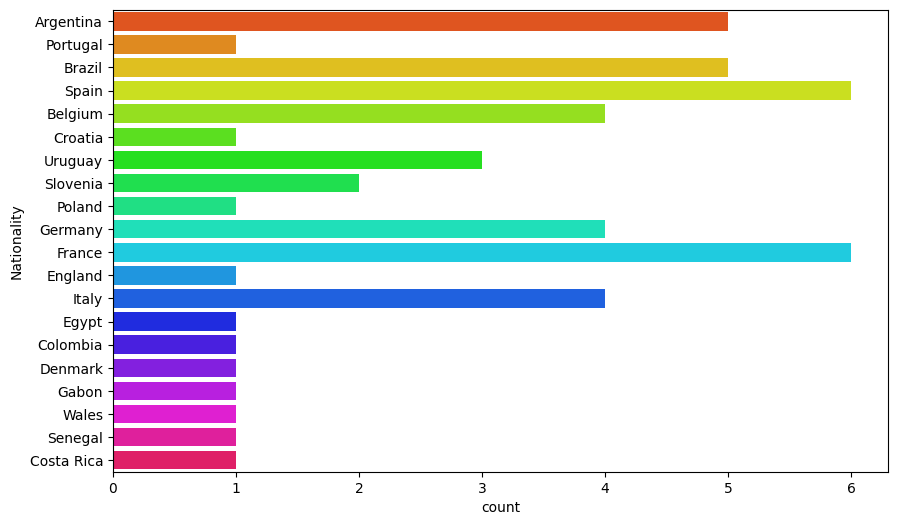

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(y="Nationality",data=df[: 50],palette="hsv")
plt.show()

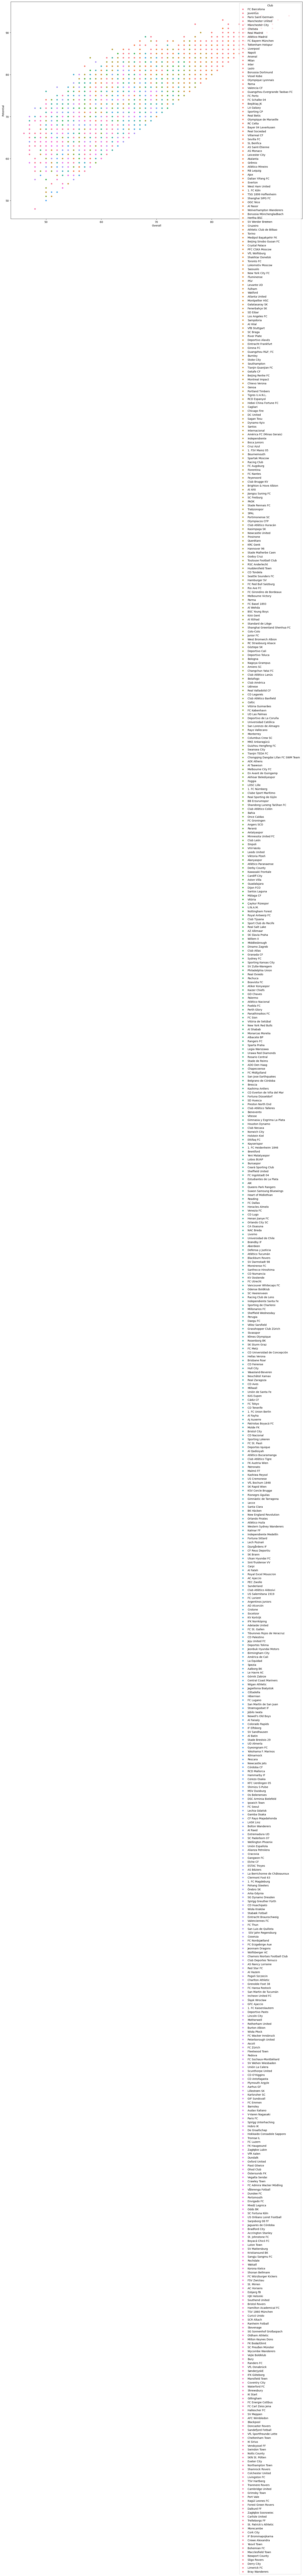

In [16]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df, x="Overall", y="Potential", hue="Club")
plt.show()

<Figure size 1000x800 with 0 Axes>

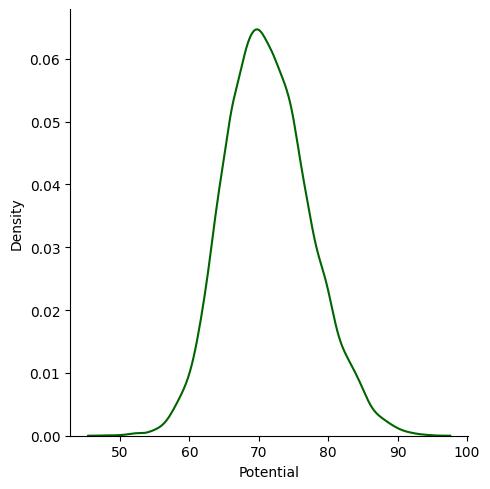

In [17]:
plt.figure(figsize=(10,8))
sns.displot(data=df, x="Potential", kind="kde",color="darkgreen")
plt.show()

<ipython-input-18-237cd834a1ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Club",data=df[: 50],palette="summer")


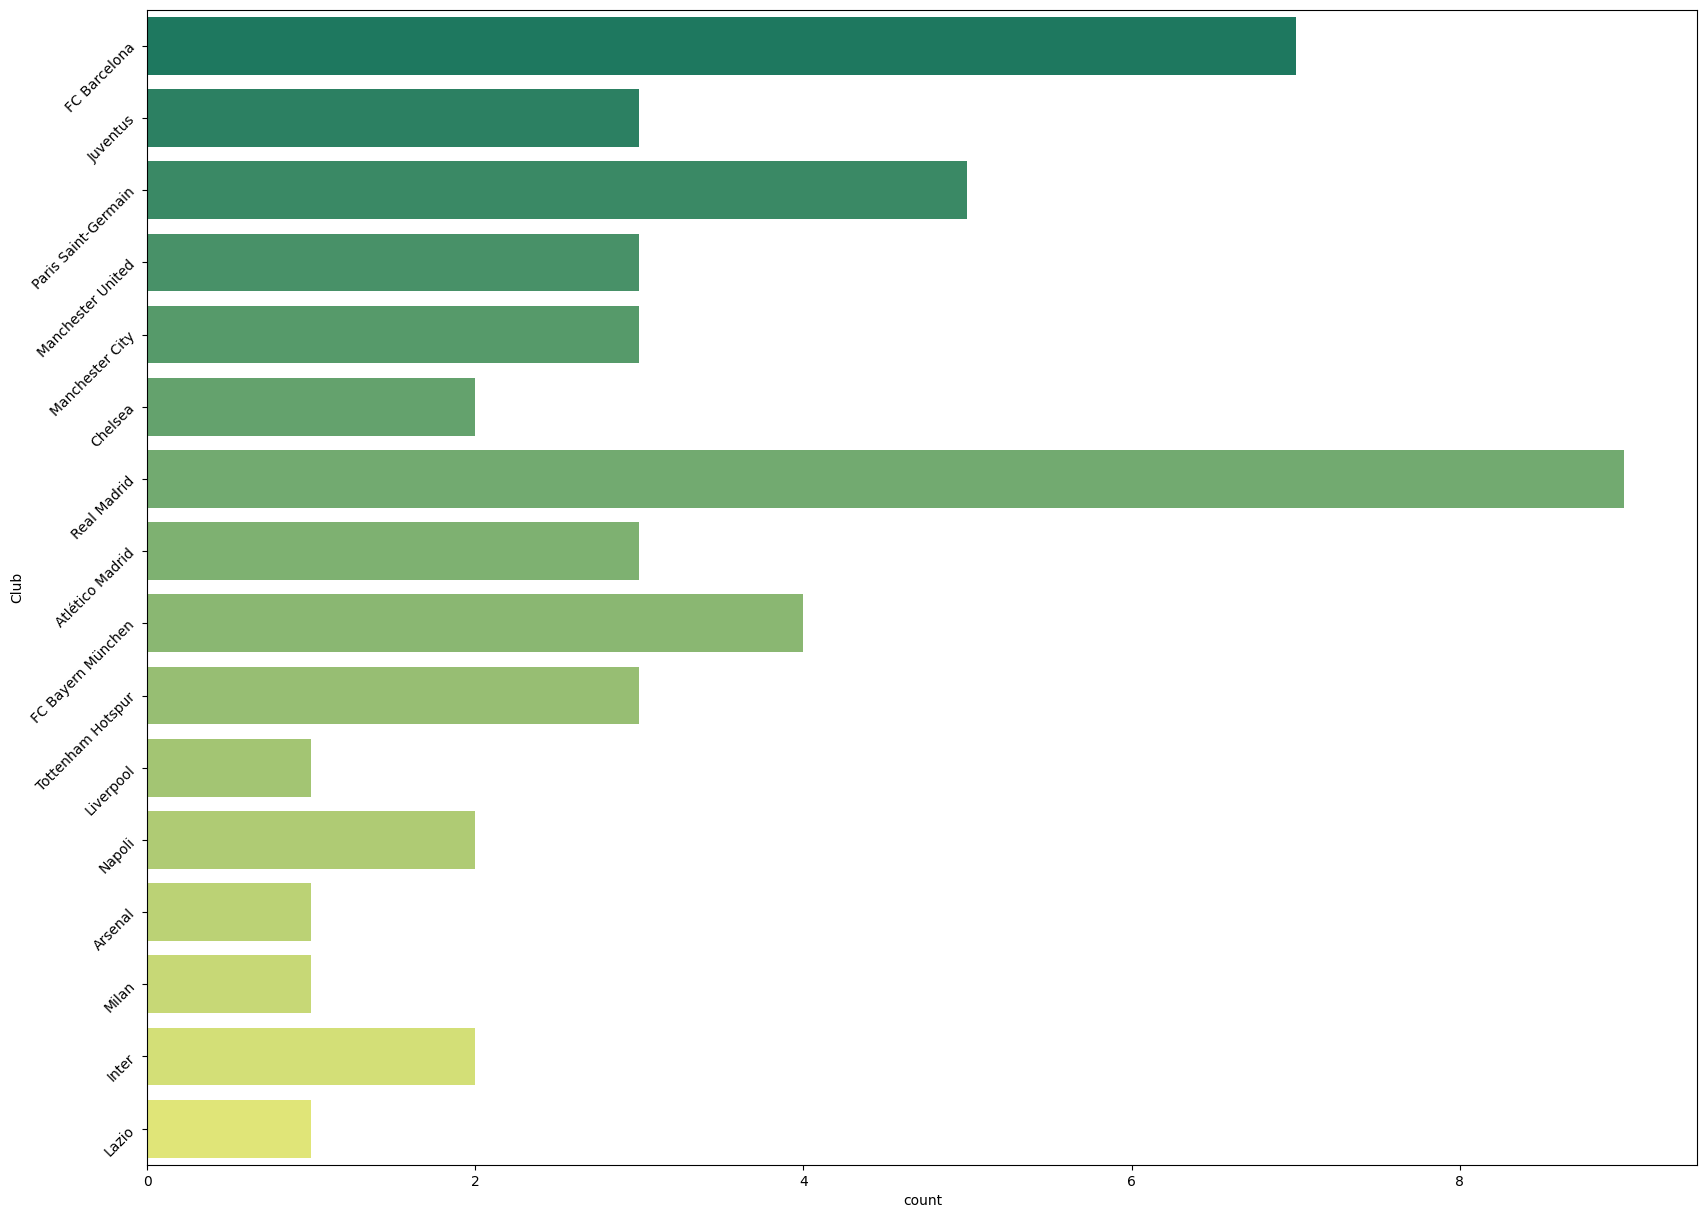

In [18]:
plt.figure(figsize=(20,15))
sns.countplot(y="Club",data=df[: 50],palette="summer")
plt.yticks(rotation=45)
plt.show()

In [19]:
# Convert the "Value" column to string type
df['Value'] = df['Value'].astype(str)

# Remove euro symbol if present
df['Value'] = df['Value'].str.replace('€', '')

# Define a function to convert abbreviations to numeric values
def convert_to_numeric(value):
    multipliers = {'K': 1000, 'M': 1000000}
    if value[-1] in multipliers:
        return float(value[:-1]) * multipliers[value[-1]]
    return float(value)

# Apply the function to convert abbreviations to numeric values
df['Value'] = df['Value'].apply(convert_to_numeric)

# Convert the column to integer type
df['Value'] = df['Value'].astype(int)



In [20]:

df['Wage'] = df['Wage'].astype(str)


df['Wage'] = df['Wage'].str.replace('€', '')

# Define a function to convert abbreviations to numeric values
def convert_to_numeric(value):
    multipliers = {'K': 1000, 'M': 1000000}
    if value[-1] in multipliers:
        return float(value[:-1]) * multipliers[value[-1]]
    return float(value)

# Apply the function to convert abbreviations to numeric values
df['Wage'] = df['Wage'].apply(convert_to_numeric)

# Convert the column to integer type
df['Wage'] = df['Wage'].astype(int)



In [21]:
df.drop(columns="ID",axis=1,inplace=True)

In [22]:

df['Release Clause'] = df['Release Clause'].astype(str)


df['Release Clause'] = df['Release Clause'].str.replace('€', '')

# Define a function to convert abbreviations to numeric values
def convert_to_numeric(value):
    multipliers = {'K': 1000, 'M': 1000000}
    if value[-1] in multipliers:
        return float(value[:-1]) * multipliers[value[-1]]
    return float(value)

# Apply the function to convert abbreviations to numeric values
df['Release Clause'] = df['Release Clause'].apply(convert_to_numeric)

# Convert the column to integer type
df['Release Clause'] = df['Release Clause'].astype(int)



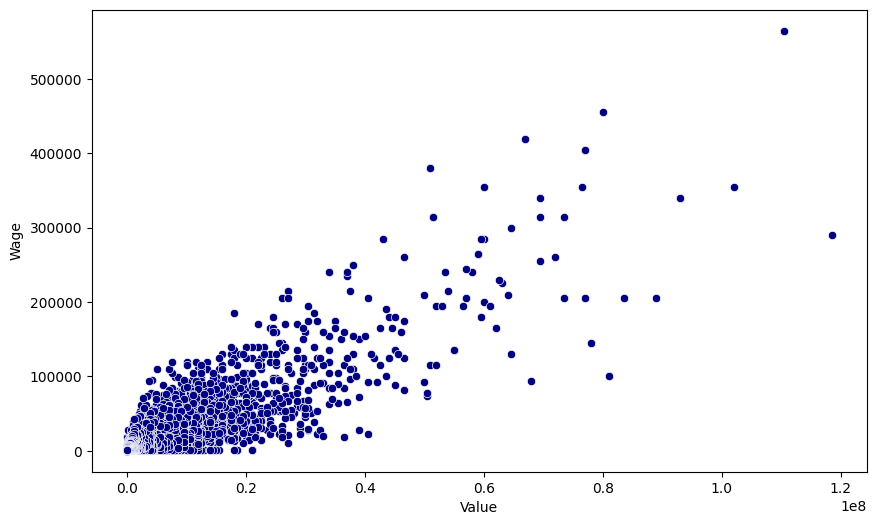

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Value", y="Wage",color="navy")
plt.show()

<Figure size 1000x600 with 0 Axes>

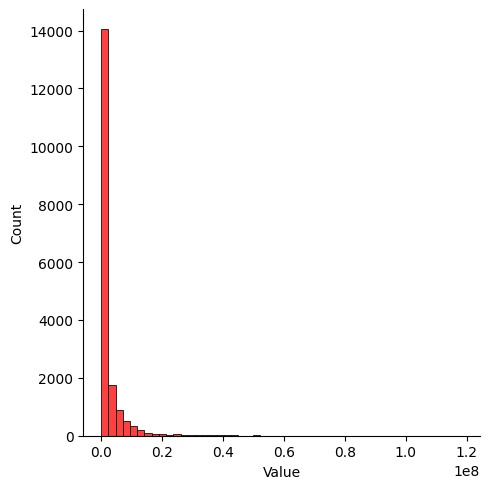

In [24]:
plt.figure(figsize=(10,6))
sns.displot(data=df, x="Value",color="red",bins=50)
plt.show()

<Figure size 1000x600 with 0 Axes>

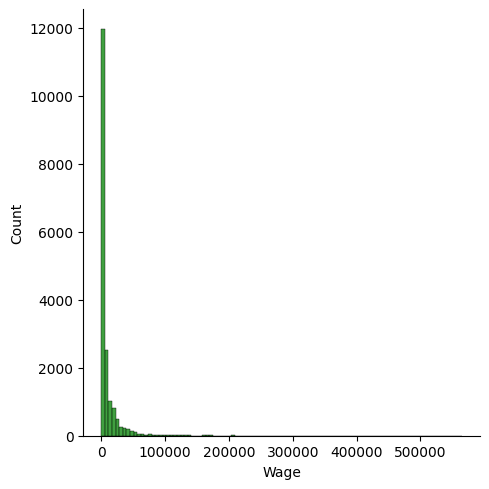

In [25]:
plt.figure(figsize=(10,6))
sns.displot(data=df, x="Wage",color="green",bins=100)
plt.show()

In [26]:
df['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [27]:
df['Height_h1']=df['Height'].apply(lambda x:x.split("'")[0])
df['Height_h2']=df['Height'].apply(lambda x:x.split("'")[1])
df['Height_h1']=pd.to_numeric(df['Height_h1'],errors='coerce')
df['Height_h2']=pd.to_numeric(df['Height_h2'],errors='coerce')

# Feature engineering

In [28]:
df['Height_m']=(df['Height_h1']* 0.3048)+(df['Height_h2']*0.0254)

In [29]:
df["Height_m"].value_counts()

Height_m
1.8288    2929
1.7780    2479
1.7526    2238
1.8034    2159
1.8796    2015
1.8542    1908
1.9050     990
1.7272     946
1.7018     905
1.9304     749
1.6764     316
1.9558     246
1.6510     145
1.9812      93
1.6256      30
2.0066      21
1.6002      18
2.0320      10
1.5748       5
1.5494       3
2.0574       2
Name: count, dtype: int64

<ipython-input-30-b4c7a587be35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Height_m",data=df,palette="winter")


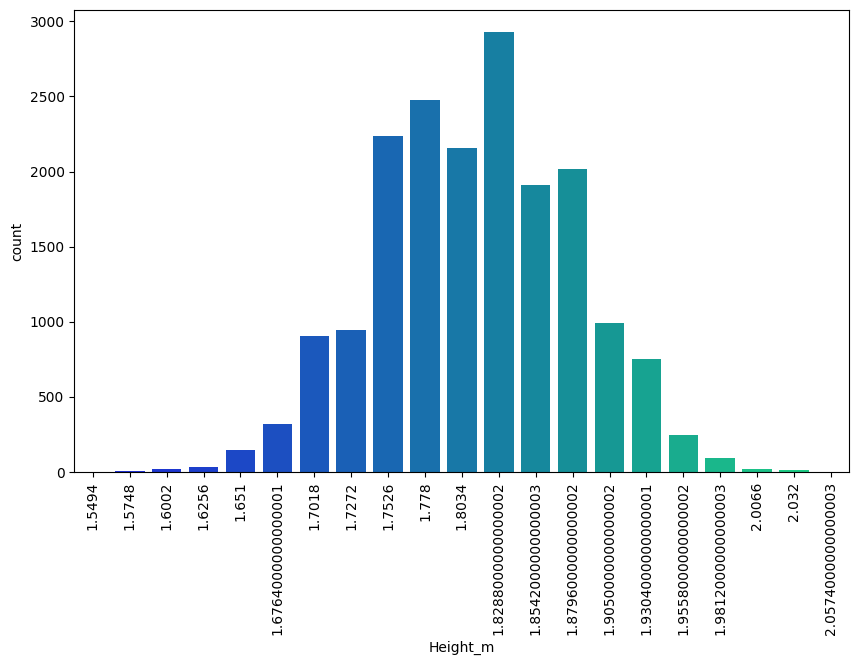

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x="Height_m",data=df,palette="winter")
plt.xticks(rotation=90)
plt.show()

<ipython-input-31-28fe0ba0565a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Preferred Foot",data=df,palette="rainbow")


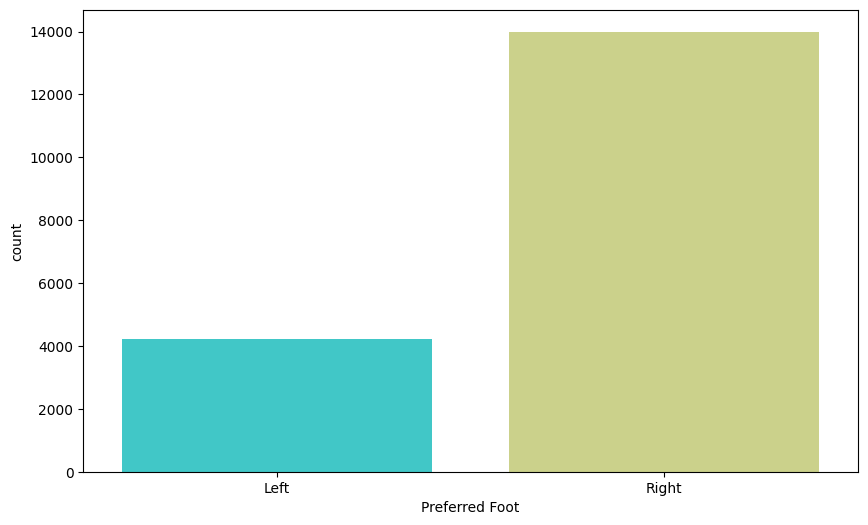

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x="Preferred Foot",data=df,palette="rainbow")
plt.show()

In [32]:
df["Position"].value_counts()

Position
ST     2212
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: count, dtype: int64

<ipython-input-33-dde0125b21b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Position",palette="Set2")


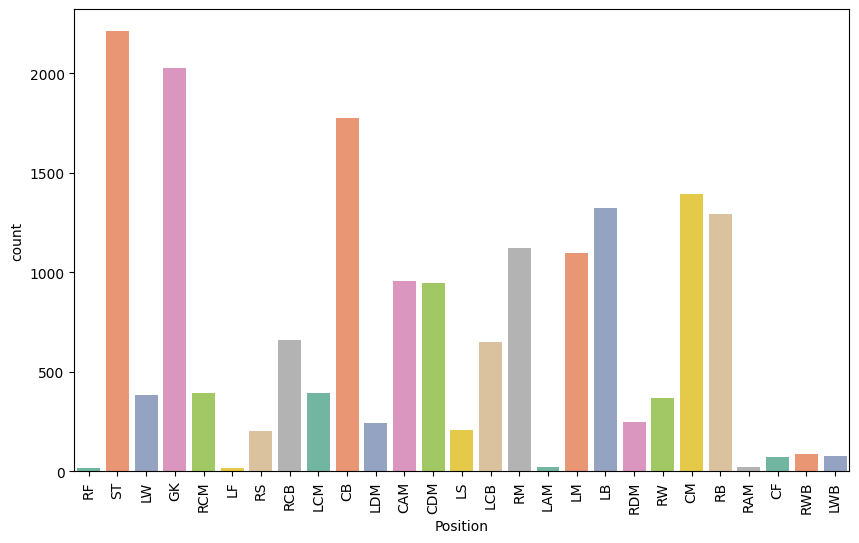

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Position",palette="Set2")
plt.xticks(rotation=90)
plt.show()

In [34]:
df["Work Rate"].value_counts()

Work Rate
Medium/ Medium    9858
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: count, dtype: int64

<ipython-input-35-5eee5efbfd74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Work Rate",palette="hsv")


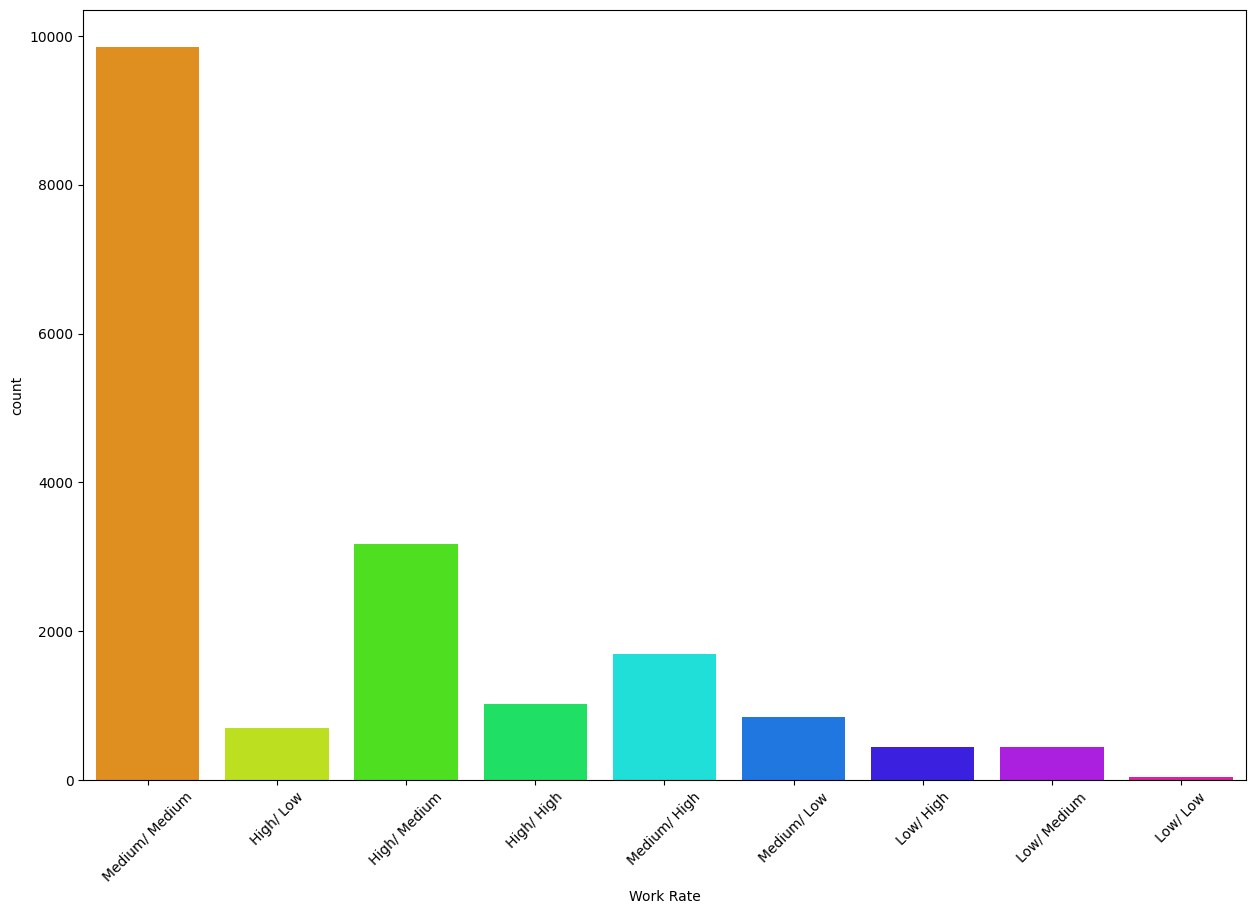

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x="Work Rate",palette="hsv")
plt.xticks(rotation=45)
plt.show()

In [36]:
df.drop(columns=['Height','Height_h1','Height_h2'],axis=1,inplace=True)

In [37]:
col=["Marking","StandingTackle","SlidingTackle","GKDiving","GKHandling","GKKicking","GKPositioning","GKReflexes","Release Clause","Height_m"]

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 10))

# Define the columns you want to plot
columns = ["Marking", "StandingTackle", "SlidingTackle", "GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes"]

# Create a figure and axes
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(15, 10))

# Plot histograms for each column
for i, column in enumerate(columns):
    axes[i, 0].hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(column)
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Plot the second histogram (just for demonstration)
    axes[i, 1].hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i, 1].set_title(column + " (2nd Histogram)")
    axes[i, 1].set_xlabel('Value')
    axes[i, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:


# Set the figure size
plt.figure(figsize=(15, 10))

# Define the columns you want to plot
columns = ["Marking", "StandingTackle", "SlidingTackle", "GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes"]

# Create a figure and axes
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 8))

# Plot boxplots for each column
for i, column in enumerate(columns):
    axes[i].boxplot(df[column].dropna())
    axes[i].set_title(column + " Boxplot")
    axes[i].set_ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
max_wage = df.groupby('Name')[['Wage']].max().sort_values(by='Wage',ascending = False).head(31)
plt.figure(figsize=[15,8])
sns.barplot(x=max_wage['Wage'],y=max_wage.index, palette='cool')
plt.title('price of each player top 30')
plt.xticks(rotation=45)
plt.show()

In [ ]:
max_age = df.groupby('Name')[['Age']].max().sort_values(by='Age',ascending = False).head(31)
plt.figure(figsize=[15,8])
sns.barplot(x=max_age['Age'],y=max_age.index, palette='hot')
plt.title('Age of each player top 30')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['total_payment']=df['Wage']+df['Release Clause']
df['total_payment']=df['total_payment'].astype(int)

In [ ]:
plt.figure(figsize=(10,8))
sns.displot(data=df, x="total_payment", kde=True,bins=50,color="darkorange")
plt.show()

In [ ]:
max_pay = df.groupby('Name')[['total_payment']].max().sort_values(by='total_payment',ascending = False).head(31)
plt.figure(figsize=[15,8])
sns.barplot(x=max_pay['total_payment'],y=max_pay.index, palette='tab20b')
plt.title('Total payment of top 30 player')
plt.xticks(rotation=45)
plt.show()